In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

freq = 1 
freq_carrier = 5
x = np.linspace(0, 5, 100)
sig = signal.square(2*np.pi*freq*x)+1

plt.plot(x, sig)

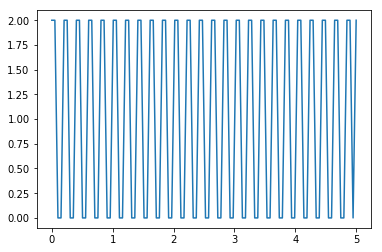

In [7]:
sig2 = signal.square(2*np.pi*freq_carrier*x)+1
plt.plot(x, sig2)

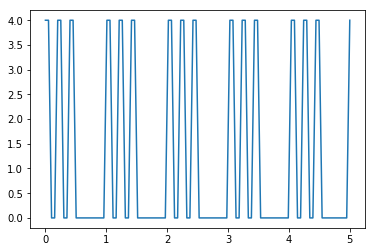

In [8]:
plt.plot(x, sig*sig2)

In [17]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

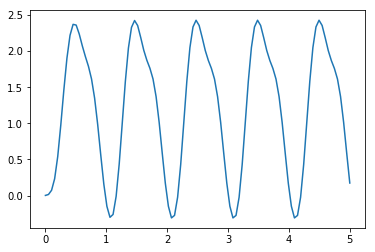

In [18]:
# N = 8 #4th order
# B, A = signal.butter(N, 0.35, output='ba')
# sig_filtered = signal.filtfilt(B, A, sig*sig2)

# plt.plot(x, sig_filtered)

# Filter requirements.
order = 6
fs = 50.0       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

y = butter_lowpass_filter(sig*sig2, cutoff, fs, order)
plt.plot(x, y)